
<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio de Sistemas de Recomendación

## Objetivos del Laboratorio

1.	Implementar y comparar diferentes tipos de sistemas de recomendación utilizando datos reales.

2.	Explorar el impacto de las características de los datos en la calidad de las recomendaciones.

3.	Desarrollar habilidades en preprocesamiento, modelado y evaluación de sistemas de recomendación.


## Los problemas

A lo largo de este laboratorio deberás enfrentarte a distintos casos prácticos:

- **Caso 1: Sistema de Recomendación Basado en Contenido**

	Debes construir un sistema que recomiende videojuegos similares basándose en su descripción y géneros. Para eso deberás:

	- Preprocesar las descripciones de los juegos (texto) utilizando técnicas de NLP aprendidas durante la clase.

	- Extraer y limpiar las etiquetas de género para su uso en el sistema de recomendación.

	- Implementar una métrica de similitud (como el coseno) para recomendar juegos similares.

	- Evaluar las recomendaciones generadas para un conjunto de juegos específicos.

- **Caso 2: Sistema de Recomendación Basado en Popularidad**

	Debes un sistema que recomiende los juegos más populares según su calificación general y número de reseñas. Para eso deberás:
	
	- Limpiar y convertir las columnas relacionadas con las calificaciones y las reseñas en datos numéricos.
	
	- Identificar los juegos más populares utilizando métricas como la mediana de calificaciones ponderadas.
	
	- Crear una tabla de recomendaciones generales para diferentes géneros.

## Los Datos


- **1. games_description.csv**: Este archivo contiene información detallada sobre videojuegos disponibles en una tienda. Las columnas que tenemos son: 


	- **`name`**: Nombre del videojuego.

	- **`short_description`**: Breve descripción del videojuego.

	- **`long_description`**: Descripción completa y detallada del videojuego.

	- **`genres`**: Lista de géneros asociados al videojuego (por ejemplo, Acción, RPG).

	- **`minimum_system_requirement`**: Requisitos mínimos para ejecutar el videojuego.

	- **`recommend_system_requirement`**: Requisitos recomendados para ejecutar el videojuego.

	- **`release_date`**: Fecha de lanzamiento del videojuego.

	- **`developer`**: Nombre del desarrollador del videojuego.

	- **`publisher`**: Nombre del publicador del videojuego.

	- **`overall_player_rating`**: Calificación general de los jugadores (categórica).

	- **`number_of_reviews_from_purchased_people`**: Número de reseñas realizadas por personas que compraron el juego.

	- **`number_of_english_reviews`**: Número de reseñas en inglés.

	- **`link`**: Enlace al videojuego en la tienda.


- **2. games_ranking.csv**: Este archivo contiene información sobre el ranking de videojuegos basados en diferentes métricas. Las columnsa que tenemos son:


	- **`game_name`**: Nombre del videojuego.

	- **`genre`**: Género principal del videojuego.

	- **`rank_type`**: Tipo de ranking (por ejemplo, ventas, popularidad).

	- **`rank`**: Posición del videojuego en el ranking correspondiente.

----

- Los datos del archivo `games_description.csv` pueden utilizarse para construir sistemas de recomendación basados en contenido.
- Los datos del archivo `games_ranking.csv` son ideales para implementar sistemas basados en popularidad.

In [21]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Para visualización de datos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para cargar los datos
# -----------------------------------------------------------------------
import pickle

# Para sistemas de recomendacion basados en cotenido
# -----------------------------------------------------------------------
from sklearn.feature_extraction.text import CountVectorizer # Vectorizacion / tokenizacion 
from sklearn.metrics.pairwise import cosine_similarity #  Cosine Similarity post Vectorizacion

# Importamos nuestras funciones
# -----------------------------------------------------------------------
from src import soporte_sistemas_recomendacion as sr

# Configuración de pandas
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None)

In [22]:
# cargamos los datos
df = pd.read_csv('datos/games_description.csv')
df.head(2)


,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
0,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,About This Game\n\t\t\t\t\t\t\tBlack Myth: Wuk...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],Overwhelmingly Positive,"(654,820)","51,931",https://store.steampowered.com/app/2358720/Bla...
1,Counter-Strike 2,"For over two decades, Counter-Strike has offer...",About This Game\n\t\t\t\t\t\t\tFor over two de...,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","21 Aug, 2012",['Valve'],['Valve'],Very Positive,"(8,313,603)","2,258,990",https://store.steampowered.com/app/730/Counter...


In [23]:
# selecion de columnas objetivo para realizar nuestro filtro colaborativo 
df_contenido = df[["name","genres"]]
df_contenido.head()


,name,genres
0,Black Myth: Wukong,"['Mythology', 'Action RPG', 'Action', 'RPG', '..."
1,Counter-Strike 2,"['FPS', 'Shooter', 'Multiplayer', 'Competitive..."
2,"Warhammer 40,000: Space Marine 2","['Warhammer 40K', 'Action', 'Third-Person Shoo..."
3,Cyberpunk 2077,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '..."
4,ELDEN RING,"['Souls-like', 'Dark Fantasy', 'Open World', '..."


In [24]:
df_contenido = df_contenido.rename(columns={'name': 'title'})
df_contenido.head()




,title,genres
0,Black Myth: Wukong,"['Mythology', 'Action RPG', 'Action', 'RPG', '..."
1,Counter-Strike 2,"['FPS', 'Shooter', 'Multiplayer', 'Competitive..."
2,"Warhammer 40,000: Space Marine 2","['Warhammer 40K', 'Action', 'Third-Person Shoo..."
3,Cyberpunk 2077,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '..."
4,ELDEN RING,"['Souls-like', 'Dark Fantasy', 'Open World', '..."


In [25]:
# Reemplazar los corchetes por nada
df_contenido['genres'] = df_contenido['genres'].str.replace(r"[\[\]']", "", regex=True)
#df_contenido['long_description'] = df_contenido['long_description'].str.replace(r"[\n\t]", "", regex=True)

In [26]:
# Crear la columna 'tags' combinando las demás columnas excepto 'name'
df_contenido['tags_v2'] = df_contenido.drop(columns=['title']).apply(
    lambda row: ' '.join(row.dropna().astype(str)), axis=1
)

# Seleccionar solo las columnas 'name' y 'tags'
df_contenido = df_contenido[['title', 'tags_v2']]

# Mostrar las primeras filas
df_contenido.head()


,title,tags_v2
0,Black Myth: Wukong,"Mythology, Action RPG, Action, RPG, Souls-like..."
1,Counter-Strike 2,"FPS, Shooter, Multiplayer, Competitive, Action..."
2,"Warhammer 40,000: Space Marine 2","Warhammer 40K, Action, Third-Person Shooter, A..."
3,Cyberpunk 2077,"Cyberpunk, Open World, Nudity, RPG, Singleplay..."
4,ELDEN RING,"Souls-like, Dark Fantasy, Open World, RPG, Dif..."


In [27]:
df_contenido['tags_v2'].unique()

array(['Mythology, Action RPG, Action, RPG, Souls-like, Combat, Story Rich, Singleplayer, Drama, Action-Adventure, Dark Fantasy, Atmospheric, Adventure, 3D, Fantasy, Hack and Slash, Third Person, Difficult, Music, Violent',
       'FPS, Shooter, Multiplayer, Competitive, Action, Team-Based, eSports, Tactical, First-Person, PvP, Online Co-Op, Co-op, Strategy, Military, War, Difficult, Trading, Realistic, Fast-Paced, Moddable',
       'Warhammer 40K, Action, Third-Person Shooter, Adventure, Multiplayer, Action-Adventure, PvE, Co-op, Third Person, Wargame, Sci-fi, 3D, Narration, Fantasy, Space, War, Realistic, Singleplayer, Cinematic, Futuristic',
       'Cyberpunk, Open World, Nudity, RPG, Singleplayer, Sci-fi, Futuristic, FPS, Mature, Story Rich, First-Person, Atmospheric, Exploration, Action, Violent, Great Soundtrack, Action RPG, Adventure, Character Customization, Immersive Sim',
       'Souls-like, Dark Fantasy, Open World, RPG, Difficult, Action RPG, Third Person, Multiplayer, Fant

In [28]:
# realizamos la vectorización, es decir, convertimos el texto a vectores para poder calcular las distancias entre películas
vectorizer = CountVectorizer(max_features=1000,stop_words= "english")

# vectorizamos la columna objetivo
X = vectorizer.fit_transform(df_contenido['tags_v2']).toarray()

# calculamos sus distancias
similarity = cosine_similarity(X)
similarity[:20]

array([[1.        , 0.16222142, 0.4738791 , ..., 0.17996851, 0.28676967,
        0.16754156],
       [0.16222142, 1.        , 0.36514837, ..., 0.11094004, 0.07071068,
        0.15491933],
       [0.4738791 , 0.36514837, 1.        , ..., 0.20254787, 0.25819889,
        0.28284271],
       ...,
       [0.24525574, 0.30237158, 0.41403934, ..., 0.20965697, 0.06681531,
        0.19518001],
       [0.53802759, 0.15075567, 0.30276504, ..., 0.1672484 , 0.2665009 ,
        0.11677484],
       [0.21629523, 0.43333333, 0.27386128, ..., 0.09245003, 0.05892557,
        0.12909944]])

In [29]:
# definimos videojuegos que le gusta al usuario para poder realizar las recomendaciones
videojuegos_usuario = 'Counter-Strike 2'

# buscamos el inidice de videojuegos, ya que lo vamos a necesitar para nuestro objetivo
movie_index = sr.get_index_from_title(videojuegos_usuario, df_contenido)

# sacamos los videojuegos similares
similar_juegos = list(enumerate(similarity[movie_index]))
similar_juegos[:3]

[(0, np.float64(0.16222142113076254)),
 (1, np.float64(1.0)),
 (2, np.float64(0.36514837167011077))]

In [30]:
# ordenamos los videojuegos
juegos_similares_ordenadas = sorted(similar_juegos,key=lambda x:x[1],reverse=True)[1:21] # [1:21] si lo cambiamos a [0:21] la tenemos a ella misma 
juegos_similares_ordenadas[:3]

[(15, np.float64(0.8467803948114512)),
 (169, np.float64(0.7302967433402214)),
 (5, np.float64(0.6761234037828133))]

C:\Users\HP\AppData\Local\Temp\ipykernel_15848\1275477387.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


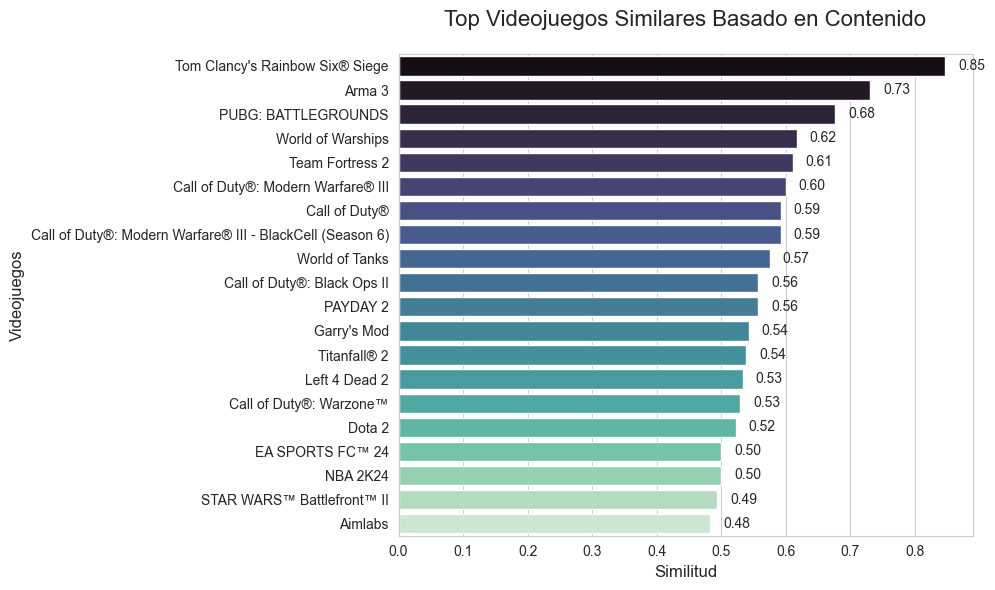

In [31]:
# y ahora buscamos el título
top_similar_juegos = {}
for i in juegos_similares_ordenadas:
    top_similar_juegos[sr.get_title_from_index(i[0], df_contenido)] = i[1]

# visualizamos los resultados
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Crear gráfico de barras
sns.barplot(
    x=list(top_similar_juegos.values()), 
    y=list(top_similar_juegos.keys()), 
    palette="mako"
)

# Añadir etiquetas y título
plt.title("Top Videojuegos Similares Basado en Contenido", fontsize=16, pad=20)
plt.xlabel("Similitud", fontsize=12)
plt.ylabel("Videojuegos", fontsize=12)

# Añadir valores al final de cada barra
for i, value in enumerate(top_similar_juegos.values()):
    plt.text(value + 0.02, i, f"{value:.2f}", va='center', fontsize=10)

plt.tight_layout()
